In [20]:
import numpy as np
from numpy import cos,sin,matrix
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

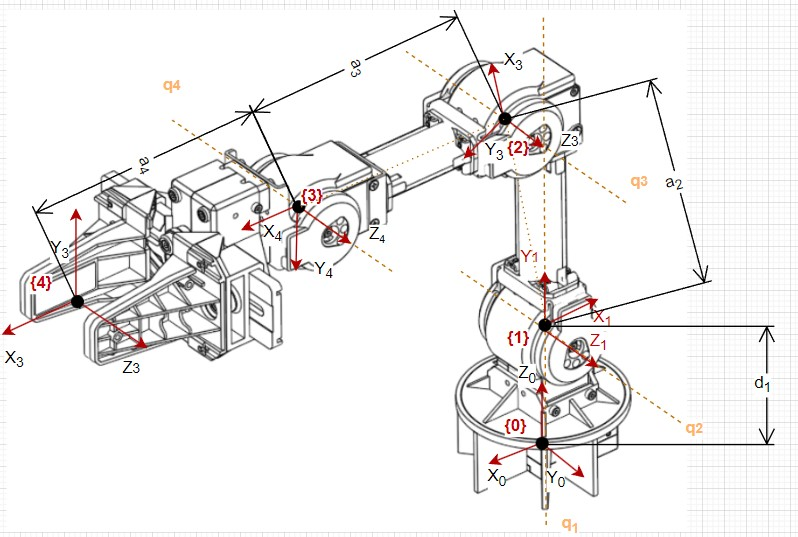
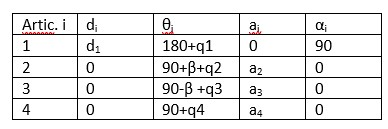

# Forward Kinematic

In [21]:
def dh_transform(alpha, a, d, theta):
    """
    Calculate the transformation matrix for a single DH parameter set.
    :param alpha: Link twist angle (in radians)
    :param a: Link length (in units)
    :param d: Link offset (in units)
    :param theta: Joint angle (in radians)
    :return: 4x4 transformation matrix
    """
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)

    # Construct the transformation matrix
    matrix = np.array([[cos_theta, -sin_theta*cos_alpha,  sin_theta*sin_alpha, a*cos_theta],
                       [sin_theta,  cos_theta*cos_alpha, -cos_theta*sin_alpha, a*sin_theta],
                       [        0,            sin_alpha,            cos_alpha,           d],
                       [        0,                    0,                    0,           1]])
    return matrix

def dh_to_transformation_matrices(dh_parameters):
    """
    Convert DH parameters of a robot arm to the transformation matrices for each frame.
    :param dh_parameters: List of DH parameter tuples (alpha, a, d, theta)
    :return: List of 4x4 transformation matrices for each frame
    """
    num_joints = len(dh_parameters)
    transformation_matrices = []
    previous_matrix = np.identity(4)

    for i in range(num_joints):
        alpha, a, d, theta = dh_parameters[i]
        matrix = dh_transform(alpha, a, d, theta)
        transformation_matrix = np.matmul(previous_matrix, matrix)
        transformation_matrices.append(transformation_matrix)
        previous_matrix = transformation_matrix

    return transformation_matrices


def plot_robot_arm(transforms):
    # Extract the joint positions from the transformation matrices
    joint_positions = [T[:3, 3] for T in transforms]
    
    # Extract the end effector position from the last transformation matrix
    end_effector_pos = transforms[-1][:3, 3]
    
    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the base
    base_pos = [0,0,0]
    ax.scatter(base_pos[0], base_pos[1], base_pos[2], c='b', marker='o')
    
    # Plot the links
    ax.plot([base_pos[0], joint_positions[0][0]],
            [base_pos[1], joint_positions[0][1]],
            [base_pos[2], joint_positions[0][2]], 'b')
    # Plot the links
    for i in range(len(joint_positions)-1):
        ax.plot([joint_positions[i][0], joint_positions[i+1][0]],
                [joint_positions[i][1], joint_positions[i+1][1]],
                [joint_positions[i][2], joint_positions[i+1][2]], 'b')
    
    # Plot the joints
    for joint_pos in joint_positions:
        ax.scatter(joint_pos[0], joint_pos[1], joint_pos[2], c='r', marker='o')
    
    # Plot the end effector
    ax.scatter(end_effector_pos[0], end_effector_pos[1], end_effector_pos[2], c='k', marker='o')
    
    # Set plot limits and labels
    ax.set_xlim([-0.25, 0.25])
    ax.set_ylim([-0.25, 0.25])
    ax.set_zlim([0, 0.25])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    # Display the plot
    plt.show()



In [22]:
# [deg]
q1 = 0
q2 = 0
q3 = 0
q4 = 0

d1 = 0.077
a2 = 0.130
a3 = 0.135
a4 = 0.126

q0 = 11  # [deg]

# (alpha, a, d, theta)
dh_parameters = [
    (      90,       0,        d1,        q1),    # frame{0} to frame{1}
    (       0,      a2,         0,        q2-q0),    # frame{1} to frame{2}
    (       0,      a3,         0,        q3+q0),    # frame{2} to frame{3}
    (       0,      a4,         0,        q4)    # frame{3} to frame{4}  
]


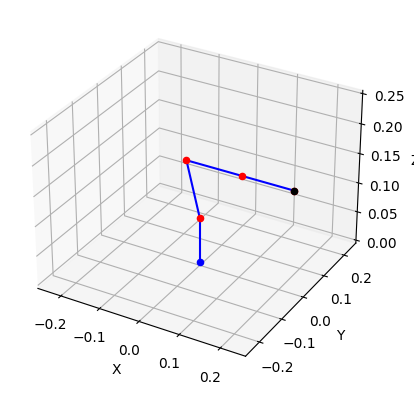

In [23]:
transformation_matrix = dh_to_transformation_matrices(dh_parameters)
plot_robot_arm(transformation_matrix)

# Jacobian